# Data Analysis With Python

<h3>House Sales in King County, USA</h3>

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


First, we need to import the important libraries we will be needing for this analysis..

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

print('Done')

Done


## Importing the datasets

We will be importing the dataset which is in a csv format from the web

In [2]:
file = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

Using the pandas to read and load the .csv file

In [4]:
df = pd.read_csv(file)

Getting the first 5 columns of the dataframe using the .head() function

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We use the function .dtypes to get the data types from the dataframe

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the .describe() function to get the statistical summary of the dataset

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Wrangling

We will use the .drop() function to delete columns "id" and "Unnamed: 0" with "axis = 1". We will then use .describe() to see the set of data left. Also make sure the parameter is set to "True"

In [8]:
df.drop(columns = ['Unnamed: 0', 'id'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Checking for missing data using the .isnull() function. False means no missing data while True means missing data

In [10]:
missing_data = df.isnull()
missing_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The below command will show a description on every column indicating the mising values and the data type inclusive

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

date
False    21613
Name: date, dtype: int64
 
price
False    21613
Name: price, dtype: int64
 
bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64
 
bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64
 
sqft_living
False    21613
Name: sqft_living, dtype: int64
 
sqft_lot
False    21613
Name: sqft_lot, dtype: int64
 
floors
False    21613
Name: floors, dtype: int64
 
waterfront
False    21613
Name: waterfront, dtype: int64
 
view
False    21613
Name: view, dtype: int64
 
condition
False    21613
Name: condition, dtype: int64
 
grade
False    21613
Name: grade, dtype: int64
 
sqft_above
False    21613
Name: sqft_above, dtype: int64
 
sqft_basement
False    21613
Name: sqft_basement, dtype: int64
 
yr_built
False    21613
Name: yr_built, dtype: int64
 
yr_renovated
False    21613
Name: yr_renovated, dtype: int64
 
zipcode
False    21613
Name: zipcode, dtype: int64
 
lat
False    21613
Name: lat, dtype: int64
 
long
False    21613
Name: long, dtype: int6

From the above illustration, it is obvious that missing data are in the colmuns "bathrooms" and "bedrooms". The below line of codes \
will show the actual number of missing values in these columns.

In [12]:
print('The number of NAN in bathroom is:', df['bathrooms'].isnull().sum())
print('The number of NAN in bedrooms is:', df['bedrooms'].isnull().sum())

The number of NAN in bathroom is: 10
The number of NAN in bedrooms is: 13


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [13]:
mean_bathroom = df['bathrooms'].mean()
print('The mean of the column bathrooms is: ', mean_bathroom)

The mean of the column bathrooms is:  2.1157362403369904


In [14]:
df['bathrooms'].replace(np.nan, mean_bathroom, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [15]:
mean_bedroom = df['bedrooms'].mean()
print('The mean of the column bedrooms is: ', mean_bedroom)

The mean of the column bedrooms is:  3.37287037037037


In [16]:
df['bedrooms'].replace(np.nan, mean_bedroom, inplace=True)

Checking if the column for "bathrooms" and "bedrooms" still have mising values.

In [17]:
print('The number of NAN in bathroom is:', df['bathrooms'].isnull().sum())
print('The number of NAN in bedrooms is:', df['bedrooms'].isnull().sum())

The number of NAN in bathroom is: 0
The number of NAN in bedrooms is: 0


## Exploratory Data Analysis

Use the method <code>value_counts()</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [18]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Creating  boxplot 

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<Axes: xlabel='waterfront', ylabel='price'>

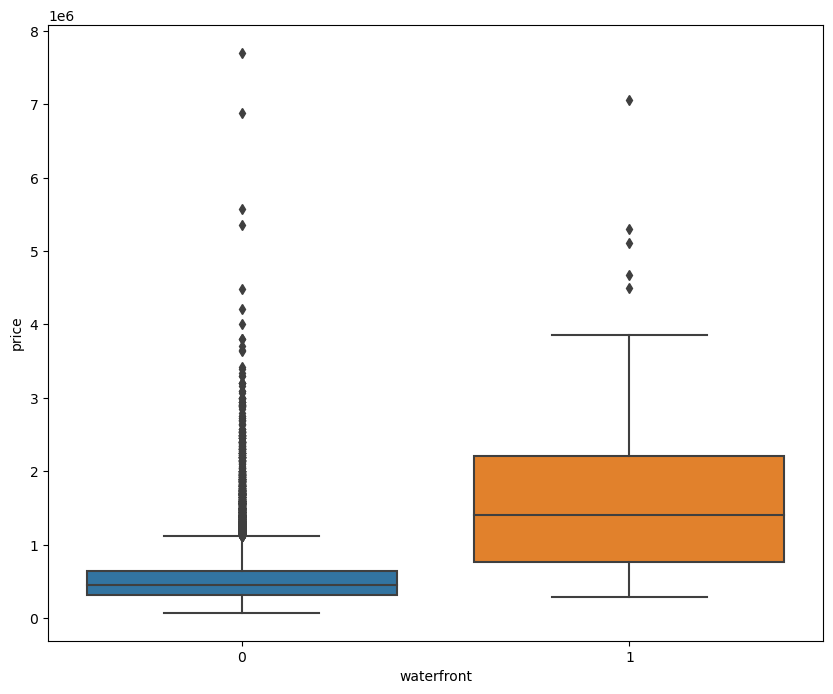

In [19]:
width = 10
length = 8
plt.figure(figsize=(width, length))

sns.boxplot(x='waterfront', y='price', data=df)

### Creating regplot

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<Axes: xlabel='sqft_above', ylabel='price'>

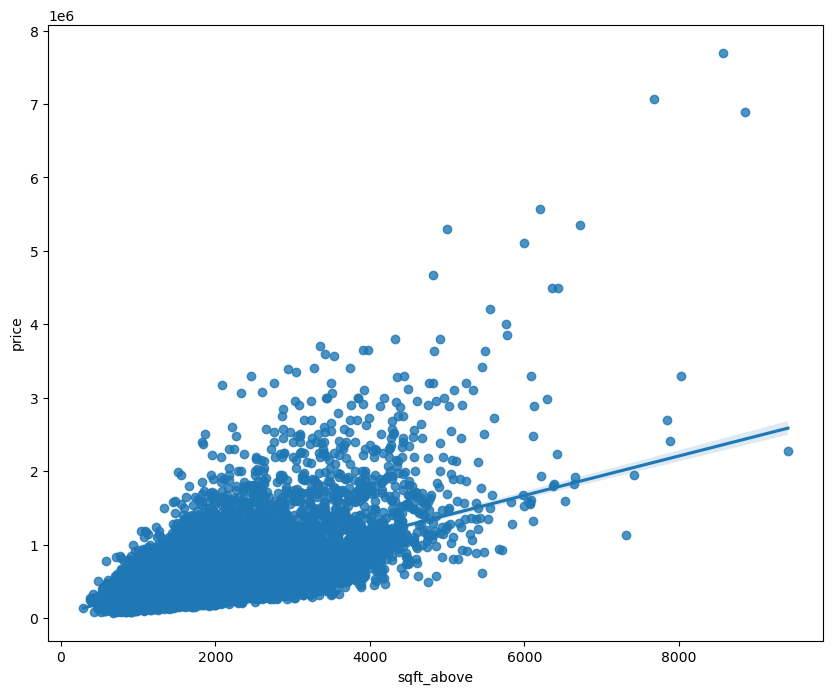

In [20]:
width = 10
length = 8
plt.figure(figsize=(width, length))

sns.regplot(x='sqft_above', y='price', data = df)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [21]:
df.corr()['price'].sort_values()

C:\Users\OBIRIFUL1\AppData\Local\Temp\ipykernel_14588\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Model Development

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [22]:
x = df[['long']]
y = df['price']
lm = LinearRegression()
lm.fit(x,y)

print('The R^2 value is: ', lm.score(x,y))

The R^2 value is:  0.00046769430149007363


### Fitting another linear regression model

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.


In [23]:
x = df[['sqft_living']]
y = df['price']
lm1 = LinearRegression()
lm1.fit(x,y)

print('The R^2 value is: ', lm1.score(x,y))

The R^2 value is:  0.4928532179037931


## Multiple Linear Regression 

Fit a linear regression model to predict the <code>'price'</code> using the list of features: 

In [24]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Calculating the value of R^2 

In [25]:
z = df[features]
y = df['price']
lm4 = LinearRegression()
lm4.fit(z,y)

print('The R^2 value is: ', lm4.score(z,y))

The R^2 value is:  0.6576885711683069


## Creating a list of tuples to help in making a Pipeline

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [26]:
input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

## Task

We will use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [27]:
pipe = Pipeline(input)
pipe.fit(df[features], df['price'])

print('The R^2 value is: ', pipe.score(z,y))

The R^2 value is:  0.7513387707402615


# Model Evaluation and Refinement


We will have to import the necessary libraries

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print('Done')

Done


We will split the data into training and testing sets:

In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

x = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

print('The number of training data set is: ', x_train.shape[0])
print('The number of testing data set is: ', x_test.shape[0])

The number of training data set is:  18371
The number of testing data set is:  3242


### Creating a Ridge

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


We will import the library to be used

In [30]:
from sklearn.linear_model import Ridge
print('Done')

Done


In [31]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

print('The R^2 value using the test data is: ', RidgeModel.score(x_test, y_test))

The R^2 value using the test data is:  0.6478759163939118


## Simple task

We will perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [32]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel1 = Ridge(alpha=0.1)
RidgeModel1.fit(x_train_pr, y_train)

print('The R^2 value utilising the test data is: ', RidgeModel1.score(x_test_pr, y_test))

The R^2 value utilising the test data is:  0.7002744279539594


# Author





Ajoku Obinna Sunday